In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from committee_learning.ode import SphericalSquaredActivationODE
from committee_learning.initial_conditions import RandomNormalInitialConditions
from committee_learning.simulation import NormalizedSphericalConstraintSimulation
from committee_learning.result import SquareODEResult, SimulationResult
import numpy as np
from tqdm import tqdm

d = 10000
p = 1
k = 1
alpha = 0.1
noise = 1e-3
dt = 1e-4
log_time = 2
id_n = 50

ic = RandomNormalInitialConditions(p,k,d,spherical=True, seed=0)

### Simulations

In [3]:
sim_times = []
sim_risks = []
for id in tqdm(range(id_n)):
  sim = NormalizedSphericalConstraintSimulation(d,p,k,noise,ic.Wteacher,alpha*p,'square',ic.W0)
  # print(f'Simulating id = {id}')
  simr = SimulationResult(initial_condition='random-spherical-test-browninian', id=id)
  simr.from_file_or_run(sim,2+np.log10(sim.d),path='computation-database/sim/')
  if id == 0:
    sim_times = np.array(simr.steps)/d
  sim_risks.append(simr.macroscopic_risk())

sim_risks = np.array(sim_risks)

100%|██████████| 50/50 [00:13<00:00,  3.70it/s]


### ODE

In [4]:
ode = SphericalSquaredActivationODE(p,k,noise,alpha*p,ic.P,ic.Q,ic.M,dt)
oder = SquareODEResult(initial_condition='random-spherical-test-brownian', id=id)
oder.from_file_or_run(ode, log_time, path='computation-database/ode/')

### Plot

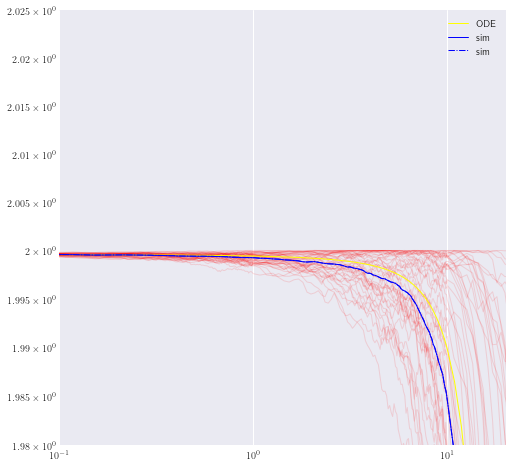

In [5]:
import matplotlib.pyplot as plt
from committee_learning.utilities import plot_style

with plot_style():
  fig, ax = plt.subplots(figsize=(8,8))
  ax.set_xscale('log')
  ax.set_yscale('log')
  ax.set_xlim(.1,20)
  ax.set_ylim(1.98,2.025)
  ax.plot(sim_times, sim_risks.T,ls='-',lw=1.,marker='',ms=5.,c='red',alpha=0.00125*np.sqrt(d))
  ax.plot(oder.times, oder.risks, label = 'ODE', ls='-',lw=1.,marker='',ms=2.,c='yellow')
  ax.plot(sim_times, np.mean(sim_risks, axis = 0), label =f'sim', ls='-',lw=1.,marker='',ms=2.,c='blue')
  ax.plot(sim_times, np.mean(sim_risks[:50], axis = 0), label =f'sim', ls='-.',lw=1.,marker='',ms=2.,c='blue')
  ax.legend()
  plt.show()
  


In [18]:
from committee_learning.sde.phase_retrivial import PhaseRetrivialSDE

sde = PhaseRetrivialSDE(noise, alpha*p, ic.P, ic.Q, ic.M, dt, 0)
sder = SquareODEResult(initial_condition='phase-retrivial-sde', id=id)
sder.from_file_or_run(sde, 2, path='computation-database/ode/', force_run=True)


0.01723299165206088


100%|██████████| 900000/900000 [02:15<00:00, 6628.28it/s]


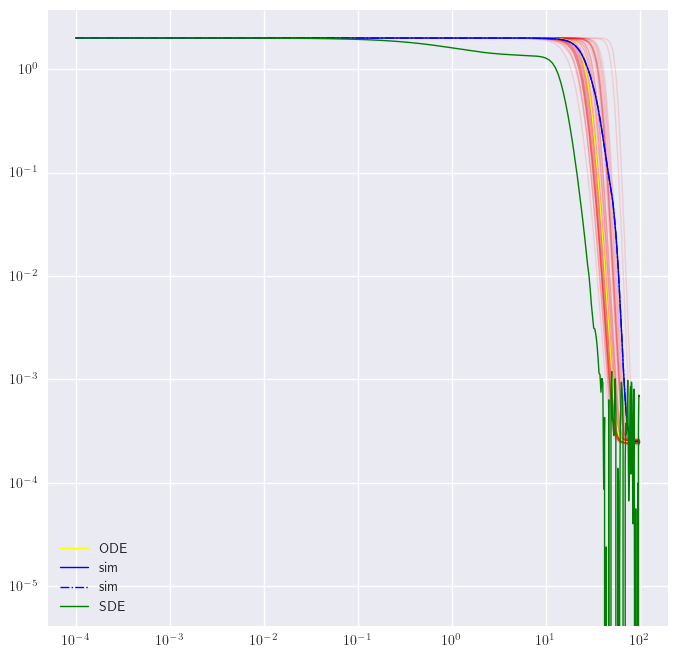

In [19]:
with plot_style():
  fig, ax = plt.subplots(figsize=(8,8))
  ax.set_xscale('log')
  ax.set_yscale('log')
  # ax.set_xlim(.1,20)
  # ax.set_ylim(1.98,2.025)
  ax.plot(sim_times, sim_risks.T,ls='-',lw=1.,marker='',ms=5.,c='red',alpha=0.00125*np.sqrt(d))
  ax.plot(oder.times, oder.risks, label = 'ODE', ls='-',lw=1.,marker='',ms=2.,c='yellow')
  ax.plot(sim_times, np.mean(sim_risks, axis = 0), label =f'sim', ls='-',lw=1.,marker='',ms=2.,c='blue')
  ax.plot(sim_times, np.mean(sim_risks[:50], axis = 0), label =f'sim', ls='-.',lw=1.,marker='',ms=2.,c='blue')
  ax.plot(sder.times, sder.risks, label = 'SDE', ls='-',lw=1.,marker='',ms=2.,c='green')
  ax.legend()
  plt.show()